# PLotting Degree Distrbutions

## Import Libraries

In [8]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
import numpy as np
import pandas as pd
import scipy
import scipy.stats as st
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

## Load Data

In [9]:
df = pd.read_csv('degree.csv')
df.head()

,Id,Label,timeset,modularity_class,componentnumber,Degree
0,0,aa,NaN,0,0,2
1,1,aaa,NaN,3348,1,7
2,2,aaafivediamond,NaN,7377,1,3
3,3,aaanews,NaN,7377,1,3
4,4,aacrowellt,NaN,1,2,2


## Get Best distribution

In [10]:
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme", "powerlaw"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for " + dist_name + " = " + str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: " + str(best_dist))
    print("Best p value: " + str(best_p))
    print("Parameters for the best fit: " + str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

get_best_distribution(list(df["Degree"]))

p value for norm = 0.0


D:\Anaconda\lib\site-packages\scipy\stats\_continuous_distns.py:1726: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


p value for exponweib = 0.0
p value for weibull_max = 0.0
p value for weibull_min = 0.0


D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for pareto = 0.0
p value for genextreme = 0.0
p value for powerlaw = 0.0
Best fitting distribution: norm
Best p value: 0.0
Parameters for the best fit: (4.395538930451648, 7.089908066502718)


('norm', 0.0, (4.395538930451648, 7.089908066502718))

## Linear Scale plot

Calculating best minimal value for power law fit
2.4323388590205166


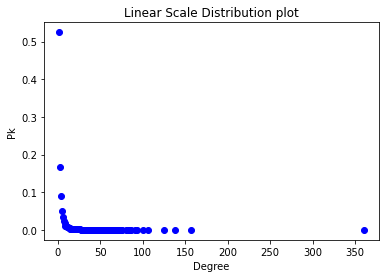

In [11]:
def linear_scale():
    # df = pd.read_csv('data.csv')
    degrees = df["Degree"]
    fit = powerlaw.Fit(list(degrees), discrete=True)
    gama = fit.power_law.alpha
    print(gama)
    degrees_dist = Counter(list(degrees))
    x = []
    y = []
    y_fit = []
    for deg in degrees_dist:
        x.append(deg)
        y.append(degrees_dist[deg] / len(degrees))
        y_fit.append(deg ** (-gama))
    plt.scatter(x, y, label="main", c='b')
    # plt.plot(x, y_fit, label="fit", c="r", linestyle="--")
    plt.title("Linear Scale Distribution plot")
    plt.ylabel("Pk")
    plt.xlabel("Degree")
    # plt.legend()
    plt.show()

linear_scale()

## Linear Binning plot

Calculating best minimal value for power law fit


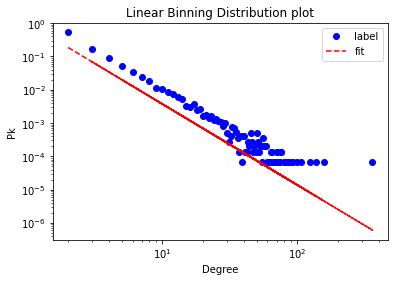

In [12]:
def linear_binning():
    degrees = df["Degree"]
    fit = powerlaw.Fit(list(degrees), discrete=True)
    gama = fit.power_law.alpha
    degrees_dist = Counter(list(degrees))
    x = []
    y = []
    y_fit = []

    for deg in degrees_dist:
        x.append(deg)
        y.append(degrees_dist[deg] / len(degrees))
        y_fit.append(deg ** (-gama))

    plt.loglog(x, y, 'bo', label="label")
    plt.loglog(x, y_fit, label="fit", c="r", linestyle="--")
    plt.title("Linear Binning Distribution plot")
    plt.ylabel("Pk")
    plt.xlabel("Degree")
    plt.legend()
    plt.show()

linear_binning()

## Log binning plot

Calculating best minimal value for power law fit


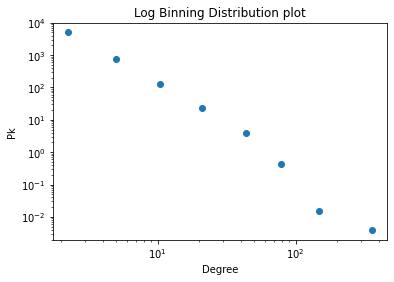

In [13]:
def log_binning():
    degrees = df["Degree"]
    fit = powerlaw.Fit(list(degrees), discrete=True)
    gama = fit.power_law.alpha
    degrees_list = list(degrees)
    bins = []
    for n in range(int(np.log2(max(degrees_list)) + 1)):
        b = [i for i in degrees_list if (2 ** n) <= i <= (2 ** (n + 1) - 1)]
        bins.append(b)
    lists = []
    for i in range(len(bins)):
        if len(bins[i]) == 0:
            continue
        k = sum(bins[i]) / len(bins[i])
        p = len(bins[i]) / (2**i)
        lists.append((k, p))
    x, y = zip(*lists)
    # y_fit = [(i ** (-gama)) for i in x]
    ax = plt.gca()
    ax.scatter(x, y)
    # ax.plot(x, y_fit, label="test", c='r')
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.title("Log Binning Distribution plot")
    plt.ylabel("Pk")
    plt.xlabel("Degree")
    # plt.legend()
    plt.show()

log_binning()


## Cumulative plot

Calculating best minimal value for power law fit
9.313105334087624 1.2414844020517685e-20
alpha: 2.4323388590205166
xmin: 4.0
xmax: None
sigma: 0.02144037272486808
D: 0.011462453611489232


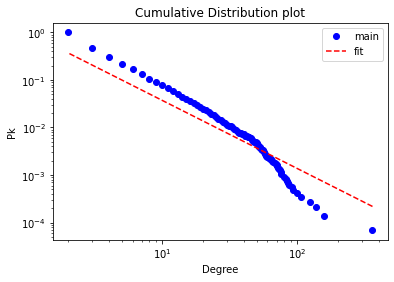

In [14]:
def cumulative():
    degrees = df["Degree"]
    fit = powerlaw.Fit(list(degrees), discrete=True)
    gama = fit.power_law.alpha
    s = fit.power_law.sigma
    R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
    print(R, p)
    print("alpha: " + str(fit.power_law.alpha))
    print("xmin: " + str(fit.power_law.xmin))
    print("xmax: " + str(fit.power_law.xmax))
    print("sigma: " + str(fit.power_law.sigma))
    print("D: " + str(fit.power_law.D))
    degree_sequence = sorted([d for d in list(degrees)], reverse=True)  # degree sequence
    degreeCount = Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    cs = np.cumsum(cnt) / len(degrees)
    y_fit = [(x ** (-gama + 1)) for x in deg if x != 0]
    plt.loglog(deg, cs, 'bo', label="main")
    plt.plot([x for x in deg if x != 0], y_fit, label="fit", c="r", linestyle="--")
    plt.title("Cumulative Distribution plot")
    plt.ylabel("Pk")
    plt.xlabel("Degree")
    plt.legend()
    plt.show()

cumulative()